### Policz, metodą bootstrapów, wartości współczynnika korelacji.

C:\Users\pawel\AppData\Local\Temp\ipykernel_18840\1600114776.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = colormap.get_cmap("magma")(normalized_data)


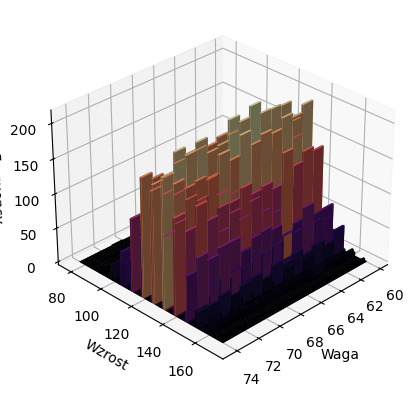

In [35]:
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
import matplotlib.colors as colors
import matplotlib.cm as colormap

def Coeff_Corr(df:np.array, col1: int, col2:int) -> float:
    coeff_corr = np.corrcoef(df[:, col1], df[:, col2])[0, 1]

    return coeff_corr


def VisualizeData(df:np.array, col1:int, col2:int, figname:str = ""):
    figure = plt.figure()
    axes = figure.add_subplot(1, 1, 1)

    sns.scatterplot( x = df[:, col1], y = df[:, col2], size = 1)

    axes.grid(True)

    axes.set_xlabel(f"Feature {col1}", loc = "right")
    axes.set_ylabel(f"Feature {col2}", loc = "top")
    
    axes.spines[["top","right"]].set_visible(False)
    axes.spines[["left","bottom"]].set_position("center")


def Create_Beatiful_Histogram(df_numpy, col1:int, col2:int):
    x = dane_numpy[:, col1]
    y = dane_numpy[:, col2]


    figure  = plt.figure()
    axes = figure.add_subplot(1, 1,1, projection = "3d")



    histogram_2d = np.histogram2d(x, y, 
                                bins = [ np.arange(min(x), max(x), 1),  np.arange(min(y), max(y), 1)  ])




    x_edges = histogram_2d[1]
    y_edges  = histogram_2d[2]

    #Define the x-cordinate and y-cordinate of each bars.
    x_cord, y_cord = np.meshgrid(x_edges[:-1], 
                                y_edges[:-1])
    z_cord = np.zeros(shape = [x_cord.flatten().shape[0]])


    #Define the x-length and y-length of each bar.
    #There are n points defining the boundaries of the intervals. However, there are n-1 interval.
    dx, dy = np.meshgrid(x_edges[1:] - x_edges[:-1]
                        , y_edges[1:]-y_edges[:-1])


    dz = histogram_2d[0]


    x_cord, y_cord, z_cord = x_cord.flatten(), y_cord.flatten(), z_cord.flatten()
    dx, dy, dz = dx.flatten(), dy.flatten(), dz.flatten()


    normalized_data = colors.Normalize(min(dz), max(dz))(dz)
    cmap = colormap.get_cmap("magma")(normalized_data)


    axes.bar3d(x_cord, y_cord, z_cord,
    dx, dy, dz, color = cmap)

    axes.view_init(30, 45)

    axes.set_xlabel("Waga")
    axes.set_ylabel('Wzrost')
    axes.set_zlabel("Frequency")

        

    
def Corr_Bootstrap(df:np.array, N0:int, N:int, col1:int, col2:int):
    correl_df  = np.zeros(shape = [N0])

    
    for i in range(N0):
        sample = resample(df, replace= True, n_samples = N)

        corr_coeff = Coeff_Corr(sample, col1, col2)
        

        correl_df[i] = corr_coeff

    return correl_df





dane  = pl.read_csv("SOCR-HeightWeight.csv", separator = ",", has_header = True).\
    cast(dtypes = {"Index":pl.Int16})

dane_numpy = dane.to_numpy()
col1 = 1
col2 = 2


Create_Beatiful_Histogram(dane_numpy, 1, 2)





### Znajdź równanie regresji liniowej opisującej zależność między wzrostem a wagą, tzn. znajdź takie liczby a, b, dla których model
### wzrost = a*waga +b
### ma najmniejszy błąd

In [31]:

from sklearn import linear_model
from sklearn import model_selection as mod_sel


train_size_perc = 0.6
waga = dane_numpy[:,col1]
wzrost = dane_numpy[:, col2]


#Podziel dane  grupę trenującą i grupę testową.
train_set, test_set = mod_sel.train_test_split(dane_numpy[:, [col1, col2]], 
                                               train_size = train_size_perc, 
                                               test_size = 1 - train_size_perc)


#Zdefiniuj obiekt typu linear_regression, a następnie "wytrenuj" go na 
# podstawie ułamka  dostępnych wierszy w ramce danych.
lin_reg = linear_model.LinearRegression()


lin_reg.fit(train_set[:,0].reshape(len(train_set),1), 
            train_set[:,1].reshape(len(train_set),1))



#Oceń dokładność regresji liniowej
Score = lin_reg.score(test_set[:,0].reshape(len(test_set),1),
                      test_set[:, 1].reshape(len(test_set), 1))

print(Score)

0.26057564586411497
